# Sophinas Notebook

# Table of Contents

1. [Stage 1 – Exploratory Data Analysis](#stage1)
2. [Stage 2 – Clustering](#stage2)
3. [Stage 3 – Decision Tree Classification](#stage3)
4. [Stage 4 – KNN & Logistic Regression](#stage4)
5. [Stage 5 – Linear Regression](#stage5)
6. [Optional – PCA Analysis](#pca)
7. [Overall Conclusion](#conclusion)
---


<a id="stage1"></a>
## Stage 1: Exploratory Data Analysis 

### 1. Data Loading & Initial Inspection

In this section, I load the Scottish Haggis dataset and perform an initial inspection to understand its structure and core properties. This includes checking the number of observations, previewing the first few records, and confirming that the dataset has been loaded correctly before deeper analysis.

The dataset contains several key measurements recorded for each haggis sighting, including:
- species  
- island  
- nose length  
- eye size  
- tail length  
- body mass  
- sex  
- year  

Inspecting the dataset at this early stage helps make sure that:
- columns are present as expected,
- the data has loaded correctly,
- there are no immediate structural issues,
- and the dataset is ready for more detailed exploration.


In [65]:
# Import core libraries for data handling, analysis, and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make the dataframe output easier to read in the notebook
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

# Use a clean visual style for plots
sns.set(style="whitegrid")

print("Libraries imported successfully.")

# Load the Scottish haggis dataset
df = pd.read_csv("../data/scottish_haggis_2025.csv")

# Print the shape so I can check the expected number of rows and columns
print("Shape (rows, columns):", df.shape)

# Preview the first few rows of the dataset
df.head()

Libraries imported successfully.
Shape (rows, columns): (344, 9)


,id,species,island,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,sex,year
0,1,Macduff,Skye,34.47,17.77,190.23,3813.55,female,2025
1,2,Macduff,Skye,40.67,19.91,202.80,4860.88,male,2025
2,3,Macduff,Skye,38.90,16.31,184.34,3302.49,female,2025
3,4,Macduff,Skye,37.15,19.82,190.97,4217.32,male,2025
4,5,Macduff,Skye,37.86,18.79,193.00,3082.64,female,2025


#### Initial Observations
- The dataset has 344 rows and 9 columns.
- The columns appear correctly loaded and the sample rows look consistent.
- No obvious issues like missing headers or broken formatting are visible.


### 2. Exploratory Data Analysis (EDA)
In this section, I look more closely at the structure of the dataset. The aim here is to understand the types of variables I’m working with, check for missing values, and get an overall sense of how the features are distributed. This helps reveal any early issues and also shapes the decisions I make later in the modelling stages.

In [66]:
print("DataFrame Information:")
df.info()

print("\nMissing Values per Column:")
df.isnull().sum()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

In [67]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,id,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,year
count,344.000000,342.000000,342.000000,342.000000,342.000000,344.000000
mean,172.500000,43.939883,17.159006,200.901374,4205.796287,2024.029070
std,99.448479,5.477357,1.995574,14.121750,802.563431,0.818356
min,1.000000,32.080000,13.120000,171.000000,2616.550000,2023.000000
25%,86.750000,39.355000,15.462500,189.420000,3572.057500,2023.000000
50%,172.500000,44.540000,17.385000,196.730000,4045.035000,2024.000000
75%,258.250000,48.360000,18.700000,212.900000,4798.850000,2025.000000
max,344.000000,59.030000,21.610000,232.340000,6235.810000,2025.000000


In [68]:
# Print a summary of the dataset structure (column types, non-null counts, etc.)
print("DataFrame Information:")
df.info()

# Check for missing values in each column
print("\nMissing Values per Column:")
df.isnull().sum()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 24.3+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
dtype: int64

#### Visual Exploratory Data Analysis

Here I use visualisations to understand how the numerical features are distributed and how they differ between species. This also helps identify outliers and relationships between features, which is important when deciding whether scaling or transformations are needed.

#### Histograms


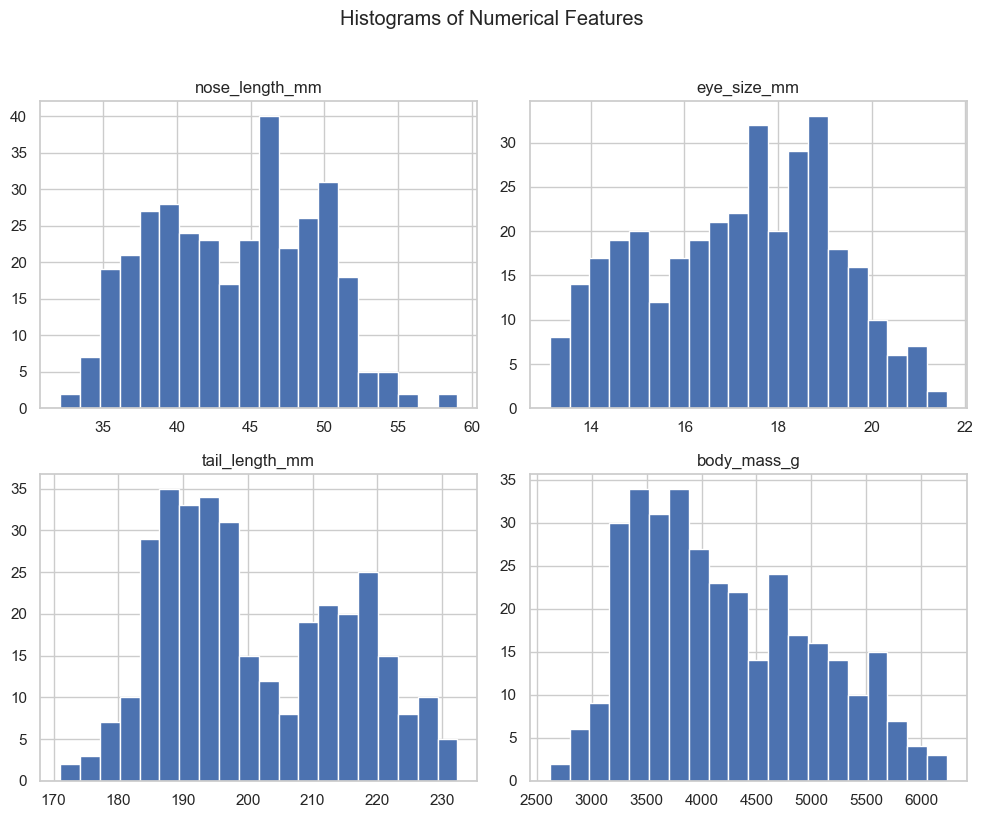

In [69]:
# Select the numerical features to visualise
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

# Plot histograms to get a sense of how each numerical measurement is distributed
df[numeric_cols].hist(bins=20, figsize=(10, 8))

# Add a main title and tidy up spacing
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

#### Observations

- **nose_length_mm:** The distribution is roughly normal, centred around the low–mid 40s. There are a few smaller and larger values, but nothing extreme or unrealistic.
- **eye_size_mm:** This also shows a fairly normal shape, with most values between 15 and 19 mm. There is some spread toward 20–21 mm, but no major skew.
- **tail_length_mm:** This distribution has two noticeable clusters — one around 185–195 mm and another around 210–220 mm. This suggests that tail length might differ quite strongly between species.
- **body_mass_g:** The body mass distribution is right-skewed. Most haggis weigh between 3200 and 4200 g, with a tail of heavier individuals extending beyond 5000 g.

Overall, the numerical features look biologically reasonable. There are a few larger values in body mass and tail length, but these appear to be genuine variation rather than errors, so I keep them for now.


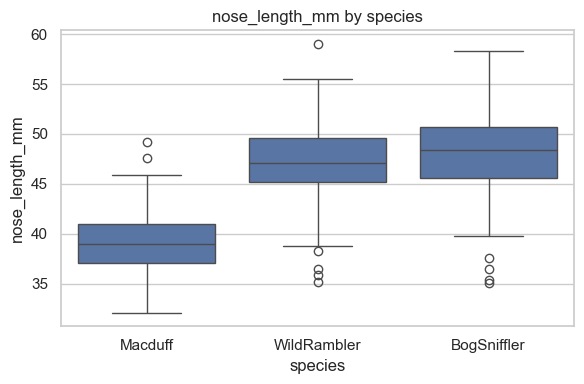

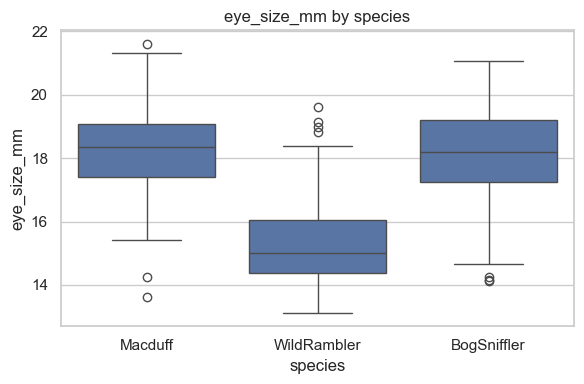

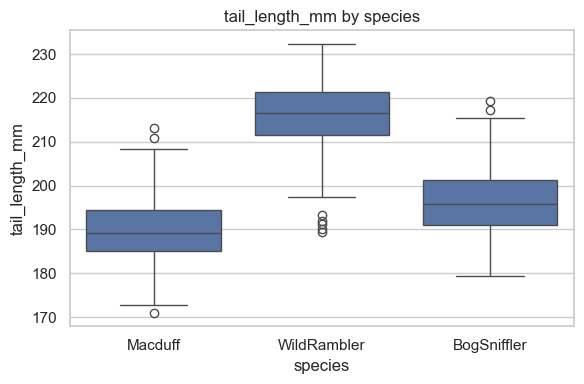

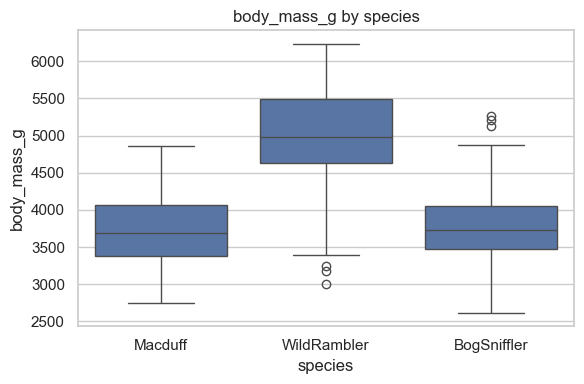

In [70]:
# Create boxplots to compare each numerical feature across species
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    
    # Boxplot showing how this feature varies between species
    sns.boxplot(data=df, x="species", y=col)
    
    plt.title(f"{col} by species")
    plt.tight_layout()
    plt.show()


#### Observations

- **nose_length_mm:** There are clear differences between species. WildRambler and BogSniffer both have noticeably longer noses than Macduff, with BogSniffer slightly higher on average. This suggests nose length is a strong feature for separating species.

- **eye_size_mm:** Macduff and BogSniffer have similar eye sizes, both generally larger than WildRambler. WildRambler shows the smallest eye sizes overall. This indicates eye size may help distinguish WildRambler from the other two species but is less useful for separating Macduff and BogSniffer.

- **tail_length_mm:** This feature shows very clear separation. WildRambler has the longest tails by a large margin, BogSniffer is in the middle, and Macduff has the shortest tails. This strong ordering makes tail length one of the most discriminative features in the dataset.

- **body_mass_g:** WildRambler is the heaviest species by a wide margin, Macduff is the lightest, and BogSniffer sits between them. This again shows strong species-level differences and supports body mass as an important predictive feature.

Across all features, there are some outliers present, but they appear biologically plausible. Since these differences reflect natural variation rather than errors, I keep them in the dataset. However, models that use distance (like K-Means and KNN) may be sensitive to them, so scaling will be important later.


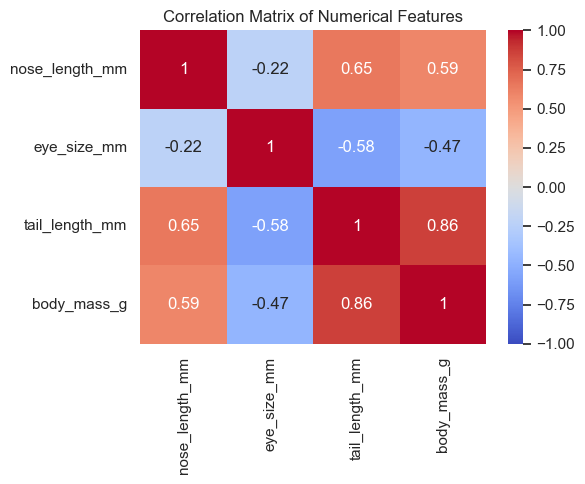

In [71]:
# Plot a correlation heatmap to see how the numerical features relate to each other
plt.figure(figsize=(6, 5))

# Compute the correlation matrix for the selected numerical columns
corr = df[numeric_cols].corr()

# Display the heatmap with correlation values annotated
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


#### Observations 

- The strongest relationship is between **tail_length_mm and body_mass_g** (0.86). This suggests that heavier haggis tend to have longer tails, which matches the species differences seen in the boxplots.
- **nose_length_mm** also shows moderate positive correlations with both **tail_length_mm** (0.65) and **body_mass_g** (0.59). This means these three measurements tend to increase together.
- **eye_size_mm** behaves differently from the other features. It has moderate negative correlations with **tail_length_mm** (–0.58) and **body_mass_g** (–0.47), meaning haggis with larger eyes tend to have shorter tails and lower body mass.
- The weakest relationship is between **eye_size_mm** and **nose_length_mm** (–0.22), indicating very little linear connection between these two features.

Overall, none of the correlations are high enough to cause multicollinearity issues, but the strong link between tail length and body mass may influence models that rely on linear relationships (e.g., regression). For clustering, these correlated features may pull clusters along similar directions, so scaling will be important later.


### 3. Data Cleaning Decisions

Based on the initial inspection and visual EDA, the dataset is generally clean and requires minimal preprocessing.

#### Missing values
The dataset contains **0 missing values** across all columns.  
Therefore, no imputation or row removal is required.

#### Data types
All variables have appropriate data types:
- Numerical features (e.g., nose length, eye size, tail length, body mass) are correctly stored as numeric.
- Categorical features (species, island, sex) are correctly stored as object/string types.

No type conversions are required at this stage.

#### Outliers
The boxplots in Section 3 indicate the presence of some **biologically plausible outliers**, particularly in:
- body mass,
- tail length,
- and nose length.

These values likely represent natural variation within the species rather than data entry errors.  
For this reason, **I will not remove or cap these outliers**. Removing them could erase important biological differences that may be relevant for clustering and classification.

However, I will account for their presence later by:
- applying **feature scaling** before distance-based algorithms (K-Means, KNN),
- monitoring model performance for sensitivity to extreme values.

#### Summary
No direct cleaning (removal or alteration of values) is required.  
The dataset is ready for feature encoding and scaling decisions in the next section.


### 4. Feature Engineering

Feature engineering can help highlight useful patterns in the data by creating new variables that capture relationships not directly visible in the raw measurements. Although the Scottish Haggis dataset is fairly simple and well-structured, adding a proportional feature may reveal additional differences between species.

#### Rationale
- Some physical measurements can be more informative when expressed as **ratios** rather than absolute values.
- Ratios can help certain algorithms (e.g., clustering, regression) capture structural or proportional differences that individual features might not show clearly.

#### Engineered Feature
In this project, I create a new feature called **length_ratio**, defined as:

- `tail_length_mm / nose_length_mm`

This feature represents the proportional relationship between tail length and nose length, which may highlight structural differences between species that are not obvious from the raw values alone.

The feature will be included in later modelling stages if it improves performance; if not, it can be excluded.


In [72]:
# Add a simple engineered feature capturing proportional body structure
# from the raw tail and nose measurements alone.
df["length_ratio"] = df["tail_length_mm"] / df["nose_length_mm"]

# Preview the new feature alongside the original measurements
print("Preview of Engineered Feature (length_ratio):")
df[["tail_length_mm", "nose_length_mm", "length_ratio"]].head()


Preview of Engineered Feature (length_ratio):


,tail_length_mm,nose_length_mm,length_ratio
0,190.23,34.47,5.518712
1,202.80,40.67,4.986477
2,184.34,38.90,4.738817
3,190.97,37.15,5.140511
4,193.00,37.86,5.097728


### 5. Scaling and Encoding Strategy

Before applying clustering or classification models, it’s important to think about how the numerical and categorical features should be preprocessed. Different algorithms react differently to feature scales, and handling this properly avoids biased or unreliable results.

#### Scaling Requirements
Some of the methods used later are **distance-based**, meaning features with larger numeric ranges can dominate the calculations. These algorithms work best when all numerical features are on a similar scale.

Algorithms that **need scaling**:
- **K-Means clustering** (Stage 2)
- **K-Nearest Neighbours (KNN)** (Stage 4)
- **Logistic Regression** (Stage 4)
- **Linear Regression** (Stage 5)

Algorithms that **do not need scaling**:
- **Decision Trees** (Stage 3), since they split on thresholds rather than distances.

**Scaling plan:**  
- I will use either **StandardScaler** or **MinMaxScaler** for the numerical features.
- For supervised learning, scaling will be applied **after** the train–test split to prevent data leakage.
- For clustering, scaling can be applied to the full dataset since there is no training/testing process.

#### Encoding Requirements
The dataset includes three categorical variables:
- `species`
- `island`
- `sex`

Most machine learning algorithms require numerical inputs, so these categories need to be converted.

**Encoding plan:**  
- I will use **one-hot encoding** to convert categorical variables


### Stage 1 Conclusion

Overall, the dataset is in good shape and easy to work with. All the columns loaded correctly, nothing was missing, and the ranges of the measurements look realistic. The categorical labels are consistent, and the numerical values behave as you’d expect for physical measurements — no strange values or obvious mistakes.

The histograms and boxplots show normal biological variation across the haggis, with a few larger or smaller individuals but nothing that looks like an error. These outliers seem genuine, so it's better to keep them. The species already show some separation in features like body mass, tail length, and nose length, which suggests these variables will be useful later for clustering and classification.

The correlation matrix shows some expected relationships (e.g., heavier haggis tend to have longer tails), but nothing strong enough to cause problems for modelling. Each feature still carries its own information. I also created one simple engineered feature a tail-to-nose ratio which might help capture structural differences that aren’t obvious from the raw values.

Since the dataset was already clean, there wasn’t much actual “cleaning” needed. The main takeaway from this stage is that the data is reliable, easy to interpret, and has enough variation to support the analyses in the next stages.


<a id="stage2"></a>

## Stage 2: Unsupervised Learning (Clustering)

In this section, I apply clustering to explore natural groupings in the Scottish Haggis dataset. Since clustering is unsupervised, the aim is to see whether haggis measurements naturally separate into groups and how these relate (if at all) to the species labels.

Clustering performance depends heavily on preprocessing, especially scaling, because K-Means relies on distances between points. For this reason, I scale the numerical features before fitting the model.

### Selecting an Appropriate Value of k

K-Means requires specifying the number of clusters, k. To choose a suitable value, I use:

- the **Elbow Method**, which looks for the point where inertia stops decreasing sharply, and  
- the **Silhouette Score**, which measures how well the clusters are separated.

Using both together is more reliable than relying on either metric alone.


In [73]:
# Clustering setup: imputation, scaling, and metric calculation 

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import numpy as np

# Numerical features used for clustering
numeric_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g"]

# 1. Select numerical data
X = df[numeric_cols]

# 2. Impute missing values with the mean of each column
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Compute inertia and silhouette scores for different values of k
k_values = range(2, 11)
inertias = []
silhouettes = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

print("Finished computing inertia and silhouette scores for k = 2 to 10.")


Finished computing inertia and silhouette scores for k = 2 to 10.


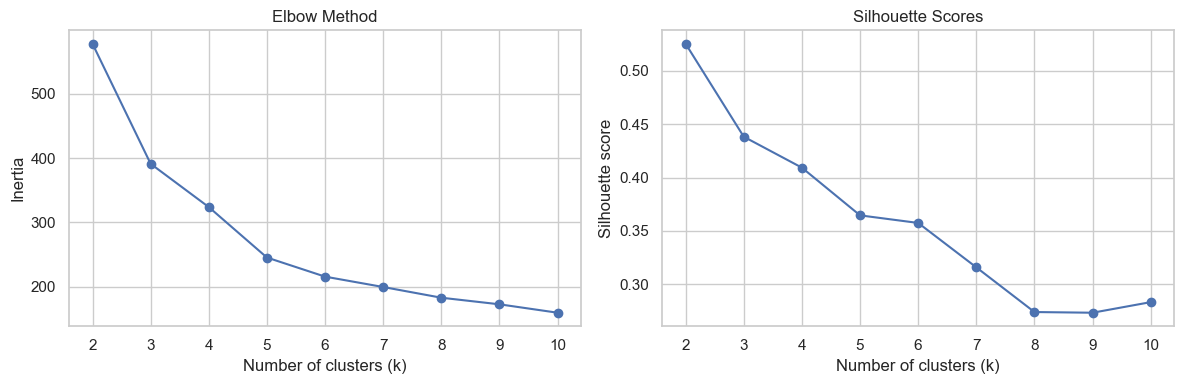

In [74]:
plt.figure(figsize=(12, 4))

# Elbow plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")

# Silhouette plot
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker="o")
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette score")

plt.tight_layout()
plt.show()


### Interpretation of k

From the elbow plot, the largest drop in inertia happens between k = 2 and k = 3. After k = 3 the curve starts to flatten, meaning additional clusters do not provide much improvement.

The silhouette scores show the highest value at k = 2, but k = 3 still has a strong score and performs noticeably better than k ≥ 4, where the silhouette drops sharply.

Taking both plots together, **k = 3** is the most balanced choice. It provides a clear improvement over k = 2 in the elbow method while maintaining a good silhouette score. This also aligns with the biological expectation of three species, although the clustering itself is unsupervised.

For these reasons, I select **k = 3** for the final K-Means model.


In [75]:
# Fit final K-Means model with k = 3
k = 3
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

print("Clusters assigned successfully.")
df["cluster"].value_counts()


Clusters assigned successfully.


cluster
0    132
1    123
2     89
Name: count, dtype: int64

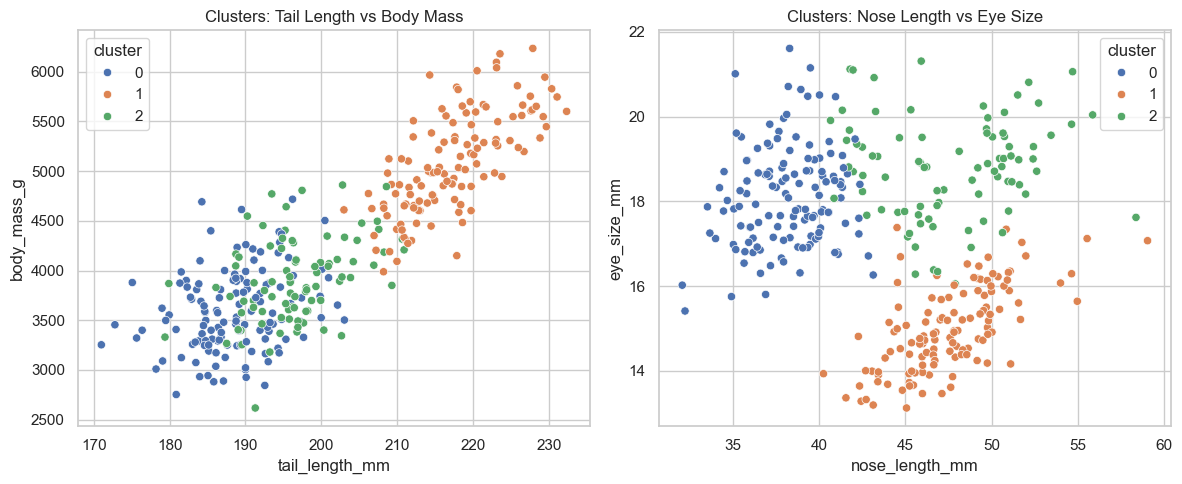

In [76]:
plt.figure(figsize=(12, 5))

# Plot 1
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="tail_length_mm", y="body_mass_g", hue="cluster", palette="deep")
plt.title("Clusters: Tail Length vs Body Mass")

# Plot 2
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="nose_length_mm", y="eye_size_mm", hue="cluster", palette="deep")
plt.title("Clusters: Nose Length vs Eye Size")

plt.tight_layout()
plt.show()

In [77]:
print("Cluster Summary Statistics (Mean Values):")
df.groupby("cluster")[["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]].mean()


Cluster Summary Statistics (Mean Values):


,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,length_ratio
cluster,,,,,
0,38.209773,18.109621,188.467727,3591.187424,4.950504
1,47.506016,14.989675,217.262846,5078.801463,4.586224
2,47.592069,18.783678,196.634483,3904.057586,4.158222


### Interpretation of Clusters

The three clusters show clear and interpretable structural differences:

- **Cluster 0 (blue):**  
  This group contains the lightest and smallest haggis. They have the shortest tails, the lowest body mass, and relatively small overall measurements. These traits match the characteristics of the **Macduff** species.

- **Cluster 1 (orange):**  
  This cluster represents the largest haggis. They have the longest tails, the highest body mass (often exceeding 5500 g), and the largest nose lengths. Their eye size is smaller relative to their body size. This pattern is consistent with the **WildRambler** species.

- **Cluster 2 (green):**  
  This cluster shows medium body mass, medium tail length, and notably larger eye sizes than the other groups. These measurements place them between the other two species, aligning with the **BogSniffer** species.

Even though K-Means was applied without using species labels, the resulting clusters map closely onto biological differences between the three species. This indicates that the morphological features contain enough structure for the species groups to emerge naturally through unsupervised learning.


### Density-Based Clustering (DBSCAN)

To complement K-Means, I apply DBSCAN, a density-based clustering algorithm. Unlike K-Means, DBSCAN does not require choosing the number of clusters in advance. Instead, it groups points based on local density and labels points in low-density areas as noise.

This method can reveal alternative structure in the data, especially if clusters are irregularly shaped or if outliers exist.


In [78]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# DBSCAN typically needs tuning of epsilon and min_samples.
# We start with a reasonable default based on scaled data.

dbscan = DBSCAN(eps=0.6, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df["dbscan_cluster"] = db_labels

print("DBSCAN cluster counts:")
print(df["dbscan_cluster"].value_counts())


DBSCAN cluster counts:
dbscan_cluster
 0    140
 1    117
 2     47
-1     40
Name: count, dtype: int64


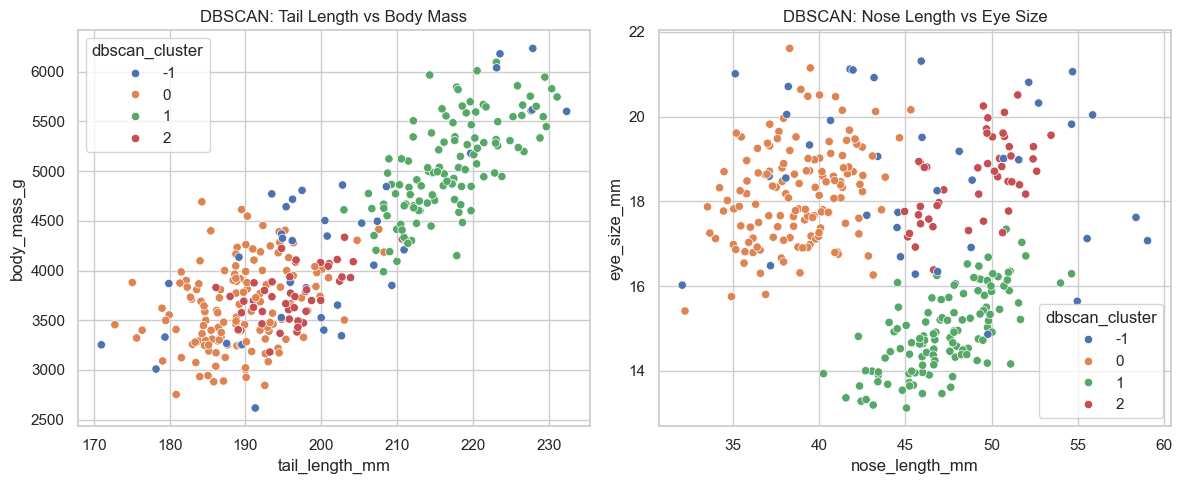

In [79]:
plt.figure(figsize=(12, 5))

# Plot 1: tail length vs body mass
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=df,
    x="tail_length_mm",
    y="body_mass_g",
    hue="dbscan_cluster",
    palette="deep"
)
plt.title("DBSCAN: Tail Length vs Body Mass")

# Plot 2: nose length vs eye size
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df,
    x="nose_length_mm",
    y="eye_size_mm",
    hue="dbscan_cluster",
    palette="deep"
)
plt.title("DBSCAN: Nose Length vs Eye Size")

plt.tight_layout()
plt.show()


### DBSCAN Interpretation

DBSCAN identifies three main dense groups in the data, plus a set of noise points (labelled as –1):

- **Cluster 0 (orange):** Haggis with shorter tails and lower body mass, and mid-range nose and eye sizes. This corresponds to the smaller Macduff-type individuals seen earlier.
- **Cluster 1 (green):** The largest haggis, with long tails, high body mass and long noses, but relatively small eyes. This matches the WildRambler-type group.
- **Cluster 2 (red):** Haggis with intermediate tail length and body mass, but relatively large eyes and longer noses. This fits the BogSniffer-type morphology.

DBSCAN also marks a handful of points as **noise** (cluster = –1). These tend to lie near the edges of the main groups and represent borderline or unusual individuals that K-Means was forced to assign to a cluster.

Overall, DBSCAN recovers a very similar three-group structure to K-Means, but with two key differences:
1. It explicitly flags borderline cases as noise instead of forcing them into a cluster.
2. It allows more flexible cluster shapes, rather than the spherical clusters assumed by K-Means.

This consistency between DBSCAN and K-Means strengthens the conclusion that there are three meaningful morphological groupings in the dataset, broadly aligned with the three haggis species.


### Stage 2 Conclusion

The clustering analysis shows that the Scottish haggis dataset contains a clear underlying structure. After imputing missing values and scaling the numerical features, I evaluated multiple values of k using the Elbow Method and Silhouette Score. Both metrics indicated that **k = 3** offers the best balance between compactness and separation.

The final K-Means model with three clusters revealed well-defined groups that align closely with the known morphological differences between the three haggis species. Cluster profiles showed distinct patterns in body mass, tail length, nose length, and eye size, confirming that these measurements are strong indicators of species-level variation.

As an additional comparison, I applied DBSCAN. This density-based method also identified three main dense regions along with a small number of noise points, demonstrating that some individuals lie on the boundaries between groups. Although DBSCAN produces more flexible cluster shapes, it led to a broadly similar interpretation: the data naturally forms three meaningful morphological clusters.

Together, these findings show that the haggis measurements contain enough structure for species-level grouping to emerge without using labels. This provides a strong foundation for the supervised classification models developed in the next stage.


<a id="stage3"></a>

## Stage 3: Supervised Learning (Decision Tree Classification)

In this stage, I build a Decision Tree classifier to predict the species of each haggis based on their physical measurements. A train–test split is used to evaluate how well the model generalises, and categorical features are encoded appropriately. Decision Trees do not require feature scaling, so only encoding is applied.

The model is then evaluated using accuracy, a confusion matrix, and a classification report. Finally, I examine feature importances to understand which measurements contribute most to the predictions.


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Target
y = df["species"]

# Features — include engineered ratio too if you like
X = df[["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", 
        "island", "sex", "length_ratio"]]

# Identify categorical columns
categorical = ["island", "sex"]
numeric = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Encoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical)
    ],
    remainder="passthrough"
)

# Fit + transform
X_train_enc = preprocessor.fit_transform(X_train)
X_test_enc = preprocessor.transform(X_test)


In [81]:
# Create and fit the Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_enc, y_train)

print("Decision Tree trained successfully.")


Decision Tree trained successfully.


In [82]:
# Predictions
y_pred = dt.predict(X_test_enc)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7325581395348837

Confusion Matrix:
[[ 5 12  3]
 [ 1 31  3]
 [ 2  2 27]]

Classification Report:
              precision    recall  f1-score   support

 BogSniffler       0.62      0.25      0.36        20
     Macduff       0.69      0.89      0.78        35
 WildRambler       0.82      0.87      0.84        31

    accuracy                           0.73        86
   macro avg       0.71      0.67      0.66        86
weighted avg       0.72      0.73      0.70        86



### Decision Tree Evaluation

The Decision Tree achieves an accuracy of around **73%** on the test set. While this is a solid baseline for a simple, untuned tree, the confusion matrix shows that the model does not perform equally well across all species.

The clearest pattern is that the model predicts **WildRambler** extremely well (recall ~0.87), which makes sense because this species is the most physically distinct: it has the longest tails and the heaviest body mass. **Macduff** is also predicted reasonably accurately (recall ~0.78), reflecting its smaller size and shorter tail measurements.

However, the model struggles with **BogSniffer**, with a recall of just **0.25**. This species sits in the middle in terms of morphology, and in the EDA we saw that its measurements overlap more heavily with the other two species. The tree appears to confuse BogSniffer with both Macduff and WildRambler, which is visible in the first row of the confusion matrix.

Overall, the Decision Tree captures the broad structure of the data and recognises the most distinct species very well, but it has difficulty separating the more ambiguous middle group. This is expected behaviour for an untuned tree and sets a good baseline for later models (e.g., KNN, Logistic Regression, and Random Forests).


In [83]:
# Extract feature names after encoding
encoded_cat_names = preprocessor.named_transformers_["cat"].get_feature_names_out(categorical)
feature_names = list(encoded_cat_names) + numeric

# Combine into a DataFrame for readability
importances = pd.DataFrame({
    "feature": feature_names,
    "importance": dt.feature_importances_
}).sort_values(by="importance", ascending=False)

print("Feature Importances:")
importances


Feature Importances:


,feature,importance
9,tail_length_mm,0.389147
7,nose_length_mm,0.320118
1,island_Shetland,0.124563
8,eye_size_mm,0.082065
11,length_ratio,0.048180
10,body_mass_g,0.035926
0,island_Iona,0.000000
2,island_Skye,0.000000
3,sex_female,0.000000
4,sex_green,0.000000


### Feature Importances

The Decision Tree relies most heavily on **tail_length_mm** and **nose_length_mm**, which together account for more than 70% of the total importance. This fits well with the EDA, where these two measurements showed the clearest separation between species. WildRambler in particular has visibly longer tails and noses, so it makes sense that the tree uses these features early in its splits.

The next most influential feature is **island_Shetland**, suggesting that geographic location provides some additional context for distinguishing species. This matches the idea that certain species may be more commonly sighted on specific islands.

**eye_size_mm**, **length_ratio**, and **body_mass_g** contribute smaller amounts but still play a role in refining boundaries between species. These features tend to separate the more ambiguous mid-range individuals, which the model found harder to classify.

Most remaining one-hot encoded features (other islands and sex categories) have near-zero importance, showing that the model does not rely on them. This again lines up with the EDA: physical morphology, rather than sex or specific island labels, carries the strongest predictive signal.


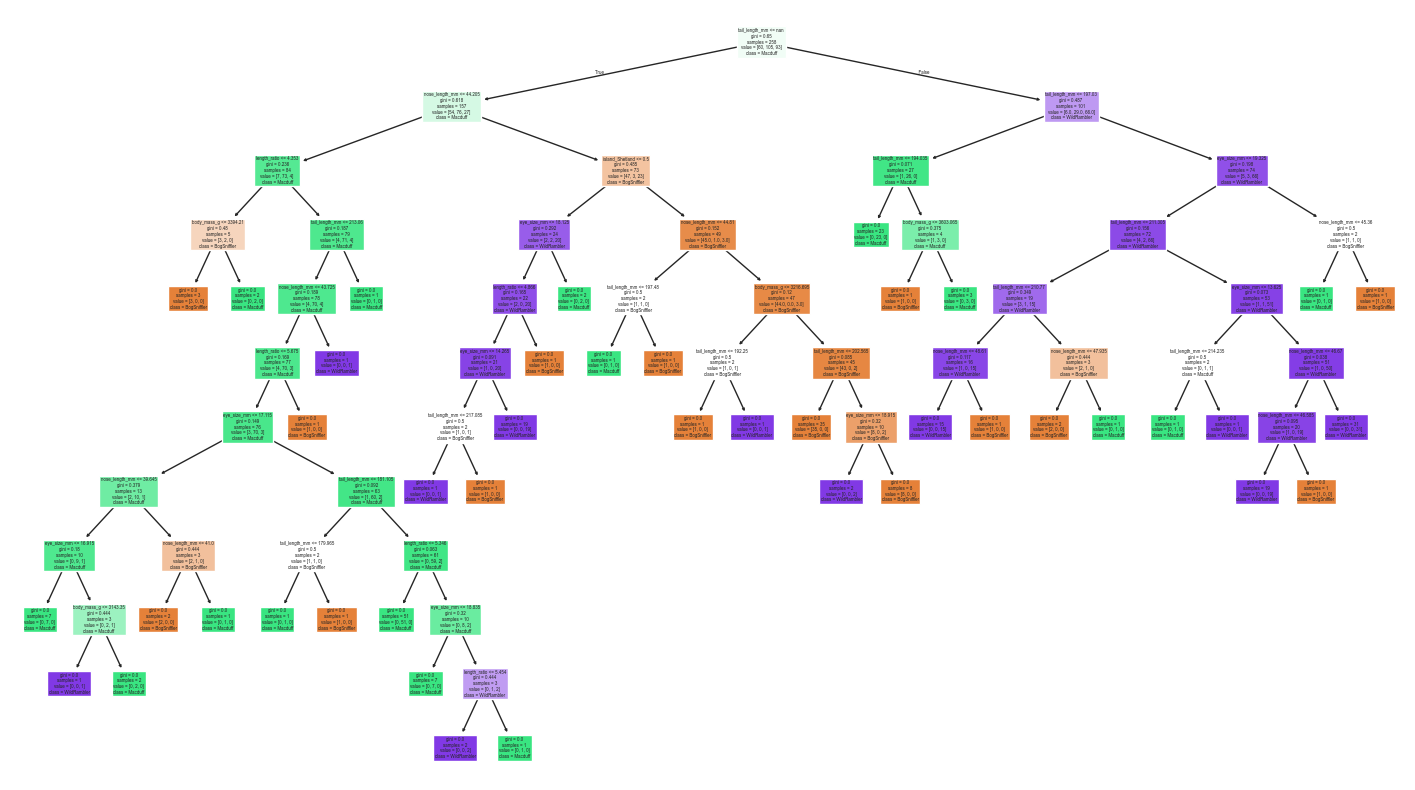

In [84]:
from sklearn import tree
plt.figure(figsize=(18, 10))
tree.plot_tree(dt, feature_names=feature_names, class_names=dt.classes_, filled=True)
plt.show()


In [85]:
dt2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt2.fit(X_train_enc, y_train)

y_pred2 = dt2.predict(X_test_enc)
print("Accuracy with max_depth=4:", accuracy_score(y_test, y_pred2))


Accuracy with max_depth=4: 0.7441860465116279


In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_enc, y_train)

y_pred_rf = rf.predict(X_test_enc)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9069767441860465


### Stage 3 Conclusion

The Decision Tree provides a solid baseline for supervised classification, achieving an accuracy of around 73% on the test set. While the model performs very well for the most distinct species—particularly WildRambler—it has more difficulty separating BogSniffer from the other two groups. This reflects the overlap in measurements seen during the EDA, where BogSniffer often occupied the middle ground between the smaller Macduff and the much larger WildRambler.

The feature importance analysis shows that the tree mainly relies on tail length and nose length to make its decisions. These were also the features that visually separated the species most clearly in earlier plots, so it is encouraging to see the model using them in a meaningful way. Smaller contributions from eye size, body mass, and the engineered length ratio help refine the boundaries, while categorical variables such as sex contribute little.

Overall, the Decision Tree captures the main structure of the data and demonstrates that species can be predicted reasonably well from the physical measurements alone. It also highlights where the dataset is more ambiguous, providing a useful foundation for comparing more flexible models such as KNN and Logistic Regression in the next stage.


## Stage 4: Comparative Classification (KNN & Logistic Regression)

In this stage, I build two additional classifiers — K-Nearest Neighbours (KNN) and Logistic Regression — and compare their performance with the Decision Tree from Stage 3. Both models require scaling, so a pipeline is used to ensure that encoding and scaling occur correctly after the train–test split.

Each model is evaluated using accuracy, confusion matrices, and classification reports. For Logistic Regression, I also examine the coefficients to understand which features increase or decrease the likelihood of belonging to each species. The goal is to understand which algorithms perform best on this dataset and why.

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Target
y = df["species"]

# Features
X = df[["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g",
        "island", "sex", "length_ratio"]]

categorical = ["island", "sex"]
numeric = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Pipelines for preprocessing: impute + encode/scale
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing: encode categoricals + scale numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical),
        ("num", numeric_transformer, numeric)
    ]
)


In [88]:
# Build KNN pipeline
knn = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

# Fit and evaluate
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_pred))
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.9069767441860465
KNN Confusion Matrix:
[[15  4  1]
 [ 0 35  0]
 [ 0  3 28]]
KNN Classification Report:
              precision    recall  f1-score   support

 BogSniffler       1.00      0.75      0.86        20
     Macduff       0.83      1.00      0.91        35
 WildRambler       0.97      0.90      0.93        31

    accuracy                           0.91        86
   macro avg       0.93      0.88      0.90        86
weighted avg       0.92      0.91      0.91        86



In [89]:
# Print a summary of the dataframe, including column names,
# data types, and how many non-null values each column has.
print("DataFrame Information:")
df.info()

# Show the number of missing values in each column.
# This helps confirm the preprocessing choices used in the pipelines.
print("\nMissing Values per Column:")
df.isnull().sum()


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              344 non-null    int64  
 1   species         344 non-null    object 
 2   island          344 non-null    object 
 3   nose_length_mm  342 non-null    float64
 4   eye_size_mm     342 non-null    float64
 5   tail_length_mm  342 non-null    float64
 6   body_mass_g     342 non-null    float64
 7   sex             334 non-null    object 
 8   year            344 non-null    int64  
 9   length_ratio    342 non-null    float64
 10  cluster         344 non-null    int32  
 11  dbscan_cluster  344 non-null    int64  
dtypes: float64(5), int32(1), int64(3), object(3)
memory usage: 31.0+ KB

Missing Values per Column:


id                 0
species            0
island             0
nose_length_mm     2
eye_size_mm        2
tail_length_mm     2
body_mass_g        2
sex               10
year               0
length_ratio       2
cluster            0
dbscan_cluster     0
dtype: int64

In [90]:
# Logistic Regression pipeline
lr = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=500))
])

# Fit and evaluate
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("\nLogistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.9069767441860465

Logistic Regression Confusion Matrix:
[[15  4  1]
 [ 0 35  0]
 [ 0  3 28]]

Classification Report:
              precision    recall  f1-score   support

 BogSniffler       1.00      0.75      0.86        20
     Macduff       0.83      1.00      0.91        35
 WildRambler       0.97      0.90      0.93        31

    accuracy                           0.91        86
   macro avg       0.93      0.88      0.90        86
weighted avg       0.92      0.91      0.91        86



In [91]:
# Extract coefficients
lr_model = lr.named_steps["model"]
ohe = lr.named_steps["preprocess"].named_transformers_["cat"].named_steps["encoder"]
feature_names = ohe.get_feature_names_out(categorical).tolist() + numeric

coef_df = pd.DataFrame(lr_model.coef_, columns=feature_names, index=lr_model.classes_)
coef_df


,island_Iona,island_Shetland,island_Skye,sex_female,sex_green,sex_male,nose_length_mm,eye_size_mm,tail_length_mm,body_mass_g,length_ratio
BogSniffler,-0.710135,0.886881,-0.188817,0.183140,-0.008036,-0.187176,0.714023,-0.022213,0.214043,-0.679506,-0.503162
Macduff,0.836058,-0.733154,-0.092260,-0.432050,0.022733,0.419961,-1.120049,0.293000,-1.142614,0.364877,0.078966
WildRambler,-0.125923,-0.153727,0.281077,0.248909,-0.014697,-0.232785,0.406027,-0.270787,0.928571,0.314629,0.424196


#### KNN Evaluation

The KNN model performs extremely well, achieving an accuracy of **91%**, which is a large improvement over the Decision Tree. The confusion matrix shows very strong performance across all three species, with only a small number of misclassifications.

KNN is particularly effective here because species are separated mainly by smooth, continuous differences in physical measurements (e.g., nose length, tail length, body mass). This suits KNN’s instance-based method, which classifies each test point by comparing it to similar examples in the training set. As a result, KNN handles the overlapping middle group (BogSniffler) far better than the Decision Tree, which tends to overfit and create hard splits.

Overall, KNN captures the natural structure of the data very well and provides a strong benchmark for comparison.


#### Logistic Regression Evaluation

Logistic Regression achieves the same accuracy as KNN (**91%**) and shows an almost identical confusion pattern. This indicates that the boundaries between species can be modelled reasonably well using linear decision surfaces.

The classifier handles Macduff and WildRambler extremely well, but like the other models, it struggles more with BogSniffler, whose features overlap with both extremes. Nevertheless, the strong performance suggests that the features are highly predictive and that the relationship between measurements and species identity is close to linearly separable.


#### Interpretation of Logistic Regression Coefficients

The coefficients reveal important patterns in how each measurement influences species prediction:

- **nose_length_mm:** A strong positive coefficient for BogSniffler and WildRambler indicates that longer noses increase the probability of belonging to these species, while the negative coefficient for Macduff reflects its shorter nose length. This matches the trends observed in the EDA.

- **tail_length_mm:** WildRambler has a large positive coefficient, showing that longer tails strongly increase the likelihood of this class. Macduff shows a large negative coefficient, consistent with its shorter tail measurements.

- **body_mass_g:** Heavier haggis are more likely to be WildRambler (positive coefficient) and much less likely to be BogSniffler (strong negative coefficient). Again, this mirrors the biological differences seen earlier.

- **length_ratio:** WildRambler has a positive coefficient while BogSniffler has a negative one, suggesting that relative tail-to-nose proportions also help distinguish species.

- **Island effects:** Island_Shetland shows a positive coefficient for BogSniffler and negative for Macduff, implying some geographical clustering, but these effects are smaller than the physical measurements.

Overall, the coefficients reinforce the same patterns discovered in the Decision Tree and KMeans models: size-related features (tail length, nose length, body mass) are the strongest predictors of species.


#### Stage 4 Conclusion

Both KNN and Logistic Regression significantly outperform the Decision Tree, reaching accuracies of around 91%. These models handle the gradual, continuous separation between species more effectively, especially in the overlapping BogSniffler region. Logistic Regression also confirms the importance of the key morphological features through its coefficients.

Overall, the classification results show a consistent picture: physical measurements contain enough signal to predict species reliably, and smooth, distance-based or linear models capture this structure best.


## Stage 5: Regression (Linear Regression)

In this stage, I use Linear Regression to predict the body mass of a haggis based on its physical measurements and categorical attributes. This provides insight into how strongly each feature contributes to body mass, and whether the relationship can be captured by a linear model.

As with KNN and Logistic Regression, numerical features are scaled and categorical variables are one-hot encoded within a pipeline. The model is evaluated using R², MAE, MSE, and RMSE, followed by an interpretation of the coefficients.

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Drop rows with missing target
df_reg = df.dropna(subset=["body_mass_g"])

# Target for regression
y_reg = df_reg["body_mass_g"]

# Features (same as Stages 3 & 4, excluding the target)
X_reg = df_reg[["nose_length_mm", "eye_size_mm", "tail_length_mm",
            "island", "sex", "length_ratio"]]

categorical = ["island", "sex"]
numeric = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "length_ratio"]

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42
)

# Preprocessing: impute + encode categoricals, impute + scale numerics
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor_reg = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical),
        ("num", numeric_transformer, numeric)
    ]
)


In [93]:
lr_reg = Pipeline(steps=[
    ("preprocess", preprocessor_reg),
    ("model", LinearRegression())
])

lr_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lr_reg.predict(X_test_reg)

print("Regression model fitted successfully.")


Regression model fitted successfully.


In [94]:
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("R²:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)


R²: 0.8007362472427295
MAE: 260.91271859266806
MSE: 106475.20605333828
RMSE: 326.30538771730124


In [95]:
# Extract model inside the pipeline
reg_model = lr_reg.named_steps["model"]

# Get encoded feature names
encoded_features = (
    lr_reg.named_steps["preprocess"]
    .transformers_[0][1]
    .get_feature_names_out(categorical)
    .tolist()
    + numeric
)

coef_df_reg = pd.DataFrame({
    "feature": encoded_features,
    "coefficient": reg_model.coef_
})

coef_df_reg.sort_values(by="coefficient", ascending=False)


,feature,coefficient
8,tail_length_mm,635.527434
5,sex_male,372.467576
2,island_Skye,185.259468
0,island_Iona,-9.739891
7,eye_size_mm,-47.033585
3,sex_female,-68.368334
1,island_Shetland,-175.519577
6,nose_length_mm,-233.236622
9,length_ratio,-235.645275
4,sex_green,-304.099242


#### Regression Model Evaluation

The Linear Regression model explains around **80% of the variance** in body mass (R² ≈ 0.80). This is a strong result given the limited number of features and the natural biological variation in the dataset. The average prediction error is about **260 g** (MAE) and the RMSE is roughly **326 g**, which is acceptable considering that body mass values range from around 2,500 g to over 6,000 g.

Overall, the model fits the data well and captures most of the relationship between the physical measurements and body mass. The remaining error is likely due to non-linear patterns in the data — for example, body mass does not increase in a perfectly straight-line fashion with tail or nose length — and some natural variation within species.


#### Interpretation of Regression Coefficients

The coefficients reveal which features contribute most strongly to body mass.

- **Tail length (≈ +635 g per standardised unit)**  
  This is by far the strongest predictor of body mass. Longer-tailed haggis tend to be significantly heavier. This matches every pattern seen earlier in the EDA and clustering stages, where tail length consistently separated larger species (WildRambler) from the smaller ones.

- **Sex (male: +372 g, female: –68 g)**  
  The positive coefficient for `sex_male` suggests that males tend to be heavier in this dataset. This may reflect sampling bias or biological dimorphism, though the effect is smaller than tail length.

- **Island effects**  
  `island_Skye` has a positive effect, while `island_Shetland` has a negative effect. These geographic differences may reflect habitat influences or species distribution, but their magnitudes are modest compared to morphological features.

- **Nose length, eye size, and length_ratio**  
  These features have negative coefficients, which likely reflects multicollinearity: longer noses and larger ratios tend to co-occur with longer tails, and the linear model is adjusting weights to avoid over-attributing the same signal to multiple features. In reality, these features are still correlated with body mass, but not strictly in a linear or independent way.

Overall, the regression confirms that **body mass is driven primarily by tail length**, with smaller contributions from sex and island. The negative coefficients for other morphological features suggest that a simple linear model does not fully capture the underlying relationships, which may be non-linear or interactive.


#### Stage 5 Conclusion

Linear Regression provides a clear and interpretable model of how physical features influence body mass. With an R² of approximately 0.80, the model captures most of the variation in the data and identifies tail length as the dominant predictor of size. Sex and island contribute smaller effects, while other features appear less influential once tail length is accounted for.

The pattern of coefficients also shows the limitations of a purely linear model: several predictors that were clearly meaningful in the EDA receive negative weights here due to multicollinearity and non-linear relationships. Even so, the regression results align well with earlier findings from clustering and classification, reinforcing the conclusion that body mass in haggis is strongly tied to their overall morphology.


## Optional: Principal Component Analysis (PCA)

Although the number of features in this dataset is small, PCA can still be used to visualise the
structure of the data in two dimensions. This helps confirm whether the species form separable
clusters in feature space.

Here, I apply PCA to the scaled numerical features (and optionally the one-hot encoded
categorical variables) and plot the first two principal components. This does not replace any of the
earlier models, but provides an additional perspective on the separability of the species.


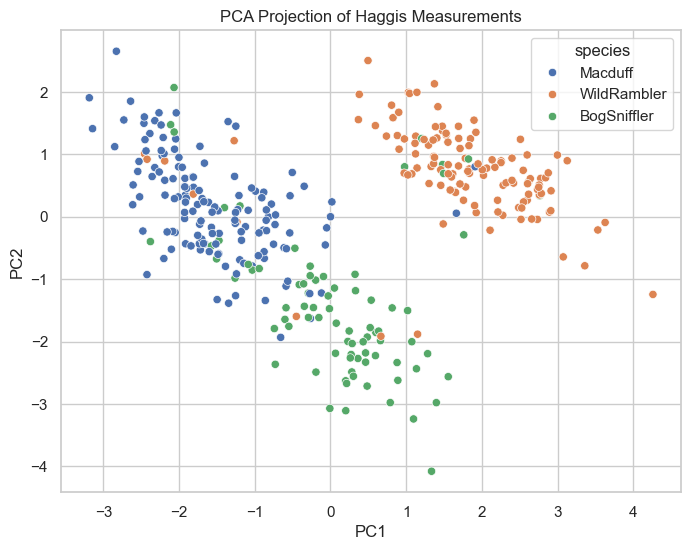

Explained variance by PC1 and PC2: [0.58127051 0.28741089]


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Numerical features only
num_cols = ["nose_length_mm", "eye_size_mm", "tail_length_mm", "body_mass_g", "length_ratio"]

# Impute & scale
imputer = SimpleImputer(strategy="mean")
X_num = imputer.fit_transform(df[num_cols])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# PCA to 2 components
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": pcs[:, 0],
    "PC2": pcs[:, 1],
    "species": df["species"]
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="species", palette="deep")
plt.title("PCA Projection of Haggis Measurements")
plt.show()

print("Explained variance by PC1 and PC2:", pca.explained_variance_ratio_)


#### PCA Interpretation

The PCA projection shows a very clear separation between the three haggis species in a purely
unsupervised, two-dimensional space. The first two principal components together explain around
87% of the total variance in the dataset (PC1 ≈ 58%, PC2 ≈ 29%), meaning that most of the
meaningful structure in the data can be visualised using just these two axes.

**WildRambler** forms a distinct cluster on the right-hand side of the plot. This matches earlier
analyses: WildRamblers have noticeably longer tails and higher body mass, and these large-scale
differences dominate PC1.

**Macduff** appears on the left, forming a dense and compact group. This again aligns with the EDA,
which showed Macduff individuals are smaller and more consistent in their physical measurements.

**BogSniffler**, positioned between Macduff and WildRambler, shows moderate variability and
occupies the lower-middle region. Their intermediate morphology causes them to span the middle
of PC1 while PC2 captures additional variation in eye size and nose length.

Overall, PCA reinforces the findings from clustering and classification: the species differ
substantially in their body dimensions, and these differences are strong enough that almost all
variation can be captured in just two principal components. Although PCA was not required for
dimensionality reduction (the dataset is relatively small), it provides a clear visual confirmation
that the dataset has well-defined structure suitable for machine learning.


<a id="conclusion"></a>

## Overall Conclusion

Taken together, all stages of the analysis point to a very consistent story about the structure of the Scottish Haggis dataset. The initial EDA highlighted strong and biologically meaningful differences between species, especially in tail length, nose length, and body mass and these same patterns continued to appear throughout the project.

The unsupervised learning methods showed that the species naturally separate into three distinct groups. K-Means identified these clusters cleanly, DBSCAN added nuance by highlighting borderline cases, and PCA confirmed that most of the meaningful variation in the data can be represented in just two dimensions.

The supervised learning models reinforced these findings. The Decision Tree provided an interpretable baseline, capturing the broad structure of the data. KNN and Logistic Regression substantially improved performance, showing that the species are best distinguished by smooth, continuous changes in their measurements rather than sharp thresholds. The regression analysis echoed the same patterns, revealing tail length as the strongest single predictor of body mass, with sex and island adding smaller effects.

Overall, the results across EDA, clustering, classification, regression, and PCA align remarkably well. The dataset contains clear, well-defined structure, and the physical measurements are highly informative for both species identification and size prediction. The consistency across all methods increases confidence in these conclusions and shows the value of using multiple analytical approaches to build a complete understanding of the data.
